In [1]:
# importing required packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:
def heading(info):
    print("\n\n##### {} #####".format(info))

In [3]:
# read the dataset
dataSet = pd.read_csv('Banglore_traffic_Dataset.csv', encoding = 'unicode_escape')

In [4]:
# print info about the data
dataSet.info()
heading("Sample data points from the dataset")
dataSet.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8936 entries, 0 to 8935
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Date                                8936 non-null   object 
 1   Area Name                           8936 non-null   object 
 2   Road/Intersection Name              8936 non-null   object 
 3   Traffic Volume                      8936 non-null   int64  
 4   Average Speed                       8936 non-null   float64
 5   Travel Time Index                   8936 non-null   float64
 6   Congestion Level                    8936 non-null   float64
 7   Road Capacity Utilization           8936 non-null   float64
 8   Incident Reports                    8936 non-null   int64  
 9   Environmental Impact                8936 non-null   float64
 10  Public Transport Usage              8936 non-null   float64
 11  Traffic Signal Compliance           8936 no

,Date,Area Name,Road/Intersection Name,Traffic Volume,Average Speed,Travel Time Index,Congestion Level,Road Capacity Utilization,Incident Reports,Environmental Impact,Public Transport Usage,Traffic Signal Compliance,Parking Usage,Pedestrian and Cyclist Count,Weather Conditions,Roadwork and Construction Activity
0,2022-01-01,Indiranagar,100 Feet Road,50590,50.230299,1.500000,100.000000,100.000000,0,151.180,70.632330,84.044600,85.403629,111,Clear,No
1,2022-01-01,Indiranagar,CMH Road,30825,29.377125,1.500000,100.000000,100.000000,1,111.650,41.924899,91.407038,59.983689,100,Clear,No
2,2022-01-01,Whitefield,Marathahalli Bridge,7399,54.474398,1.039069,28.347994,36.396525,0,64.798,44.662384,61.375541,95.466020,189,Clear,No
3,2022-01-01,Koramangala,Sony World Junction,60874,43.817610,1.500000,100.000000,100.000000,1,171.748,32.773123,75.547092,63.567452,111,Clear,No
4,2022-01-01,Koramangala,Sarjapur Road,57292,41.116763,1.500000,100.000000,100.000000,3,164.584,35.092601,64.634762,93.155171,104,Clear,No


In [5]:
# lets find the individual column statistics
heading("Stats about non-numeric values")
print(dataSet.describe(include = "object"))

heading("Stats about numeric values")
print(dataSet.describe(include = "number"))



##### Stats about non-numeric values #####
              Date    Area Name Road/Intersection Name Weather Conditions  \
count         8936         8936                   8936               8936   
unique         952            8                     16                  5   
top     2023-01-24  Indiranagar          100 Feet Road              Clear   
freq            15         1720                    860               5426   

       Roadwork and Construction Activity  
count                                8936  
unique                                  2  
top                                    No  
freq                                 8054  


##### Stats about numeric values #####
       Traffic Volume  Average Speed  Travel Time Index  Congestion Level  \
count     8936.000000    8936.000000        8936.000000       8936.000000   
mean     29236.048120      39.447427           1.375554         80.818041   
std      13001.808801      10.707244           0.165319         23.533182   




##### Target variable "Traffic volume" distribution #####


<Axes: xlabel='Traffic Volume', ylabel='Count'>

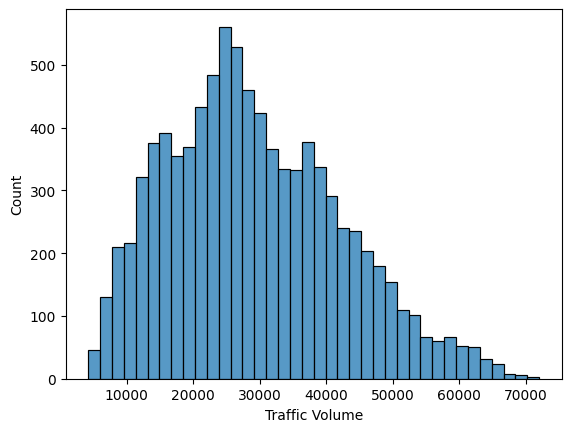

In [6]:
# lets first verify how to target variable is distributed
heading("Target variable \"Traffic volume\" distribution")
sns.histplot(data = dataSet, x = "Traffic Volume")

In [7]:
# lets convert the categorical values to numeric
def convert_categorical_to_numeric(dataframe, categorical_cols):
    
    for col in categorical_cols:
        if col in dataframe.columns:
            # create a mapping for the unique values in the column
            unique_values = dataframe[col].unique()
            value_mapping = {label: idx for idx, label in enumerate(unique_values)}
            
            # apply the mapping to convert to numeric
            dataframe[col] = [value_mapping[val] for val in dataframe[col]]
    
    return dataframe

# leaving date column as of now and converting other columns

# we will backup the original dataset 
originalDataset = dataSet.copy()

# select the relevant columns and convert them
columnsToConvert = ["Roadwork and Construction Activity","Weather Conditions","Area Name","Road/Intersection Name"]
dataSet = convert_categorical_to_numeric(dataSet, columnsToConvert)

heading("After conversion to numeric values")
print(dataSet[columnsToConvert].head())



##### After conversion to numeric values #####
   Roadwork and Construction Activity  Weather Conditions  Area Name  \
0                                   0                   0          0   
1                                   0                   0          0   
2                                   0                   0          1   
3                                   0                   0          2   
4                                   0                   0          2   

   Road/Intersection Name  
0                       0  
1                       1  
2                       2  
3                       3  
4                       4  


In [8]:
# drop unrequired columns based on corelation matrix
dropThem = ["Public Transport Usage", "Traffic Signal Compliance", "Parking Usage", "Roadwork and Construction Activity","Weather Conditions", "Date"]
dataSet = dataSet.drop(columns=dropThem)

heading("Final dataset columns")
print(dataSet.head())



##### Final dataset columns #####
   Area Name  Road/Intersection Name  Traffic Volume  Average Speed  \
0          0                       0           50590      50.230299   
1          0                       1           30825      29.377125   
2          1                       2            7399      54.474398   
3          2                       3           60874      43.817610   
4          2                       4           57292      41.116763   

   Travel Time Index  Congestion Level  Road Capacity Utilization  \
0           1.500000        100.000000                 100.000000   
1           1.500000        100.000000                 100.000000   
2           1.039069         28.347994                  36.396525   
3           1.500000        100.000000                 100.000000   
4           1.500000        100.000000                 100.000000   

   Incident Reports  Environmental Impact  Pedestrian and Cyclist Count  
0                 0               151.180       

In [9]:
# seperate the input and target columns into numpy arrays
if isinstance(dataSet, pd.DataFrame):
    dataSet = dataSet.to_numpy()
# print(dataset)
X = dataSet[:, [0, 1, 3, 4,5,6,7,8,9]]
Y = dataSet[:, 2] 

# adding extra column for intercepts
X = np.hstack((np.ones((X.shape[0], 1)), X))
heading("Printing X and Y variables for the model")
print(X[:5])
print(Y[:5])




##### Printing X and Y variables for the model #####
[[  1.           0.           0.          50.23029856   1.5
  100.         100.           0.         151.18       111.        ]
 [  1.           0.           1.          29.37712471   1.5
  100.         100.           1.         111.65       100.        ]
 [  1.           1.           2.          54.47439821   1.03906885
   28.34799386  36.39652494   0.          64.798      189.        ]
 [  1.           2.           3.          43.81761039   1.5
  100.         100.           1.         171.748      111.        ]
 [  1.           2.           4.          41.11676289   1.5
  100.         100.           3.         164.584      104.        ]]
[50590. 30825.  7399. 60874. 57292.]


In [10]:
# shuffle the datasets
indices = np.arange(X.shape[0])
np.random.shuffle(indices)
# 
X_shuffled = X[indices]
Y_shuffled = Y[indices]

# split the dataset into 80:20
split_ratio = 0.1
split_index = int(len(X_shuffled) * split_ratio)

X_train = X_shuffled[:split_index]
Y_train = Y_shuffled[:split_index]

X_test = X_shuffled[split_index:]
Y_test = Y_shuffled[split_index:]

print("Training set samples: ", X_train.shape[0])
print("Testing set samples: ", X_test.shape[0])

Training set samples:  893
Testing set samples:  8043


In [11]:
# Mean square error function
def mse(y):
    return np.mean((y - np.mean(y)) ** 2)

# Compute weighted MSE on both sides
def mse_split(left, right):
    n_left, n_right = len(left), len(right)
    total = n_left + n_right
    return (n_left / total) * mse(left) + (n_right / total) * mse(right)

# Split data based on feature
def split_data(data, feature, value):
    left = data[data[feature] <= value]
    right = data[data[feature] > value]
    return left, right

In [12]:
class DecisionTreeRegression:
    def __init__(self, max_depth=3):
        self.max_depth = max_depth
        self.tree = None

    def fit(self, data, depth=0):
        # Stop splitting if max depth is reached or data is too small
        if depth >= self.max_depth or len(data) <= 1:
            return np.mean(data['y'])  # Leaf node

        # Initialize variables to track the best split
        best_feature, best_value = None, None
        best_mse = float('inf')
        best_left, best_right = None, None

        # Iterate over all features and values to find the best split
        for feature in data.columns[1:]:  # Exclude 'y'
            for value in data[feature].unique():
                left, right = split_data(data, feature, value)
                if len(left) == 0 or len(right) == 0:
                    continue  # Skip invalid splits
                
                current_mse = mse_split(left['y'], right['y'])

                # Update the best split if the current one is better
                if current_mse < best_mse:
                    best_mse = current_mse
                    best_feature, best_value = feature, value
                    best_left, best_right = left, right

        # Create a decision node with the best split
        self.tree = {
            'feature': best_feature,
            'value': best_value,
            'left': self.fit(best_left, depth + 1),
            'right': self.fit(best_right, depth + 1)
        }
        return self.tree

    def predict_one(self, x, node=None):
        # Predict the value for a single example by traversing the tree
        if node is None:
            node = self.tree

        if isinstance(node, (int, float)):  # If it's a leaf node
            return node

        if x[node['feature']] <= node['value']:
            return self.predict_one(x, node['left'])
        else:
            return self.predict_one(x, node['right'])

    def predict(self, X):
        # Predict for all examples in the dataset
        return X.apply(lambda row: self.predict_one(row), axis=1)


In [47]:
# Initialize the model
model = DecisionTreeRegression(max_depth=11)

decisionTreeData = pd.DataFrame({'y':Y_train})

for i in range(X_train.shape[1]):
    decisionTreeData['X'+str(i)] = X_train[:,i]

print(decisionTreeData.columns[1:])
print(decisionTreeData.shape)
# Train the model
model.fit(decisionTreeData)
print("Trained Tree:", model.tree)


Index(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9'], dtype='object')
(893, 11)
Trained Tree: {'feature': 'X8', 'value': np.float64(114.598), 'left': {'feature': 'X8', 'value': np.float64(89.50999999999999), 'left': {'feature': 'X8', 'value': np.float64(75.51599999999999), 'left': {'feature': 'X8', 'value': np.float64(69.068), 'left': {'feature': 'X8', 'value': np.float64(63.966), 'left': {'feature': 'X6', 'value': np.float64(26.86278697457706), 'left': {'feature': 'X3', 'value': np.float64(46.82973360305262), 'left': {'feature': 'X2', 'value': np.float64(14.0), 'left': np.float64(5657.0), 'right': np.float64(5435.0)}, 'right': {'feature': 'X2', 'value': np.float64(14.0), 'left': np.float64(4233.0), 'right': np.float64(4924.0)}}, 'right': {'feature': 'X8', 'value': np.float64(62.886), 'left': {'feature': 'X8', 'value': np.float64(62.588), 'left': {'feature': 'X3', 'value': np.float64(44.22517225668114), 'left': np.float64(6193.0), 'right': {'feature': 'X1', 'value': np.fl

In [49]:
# Make predictions on the dataset
decisionTreeTest = pd.DataFrame()

for i in range(X_test.shape[1]):
    decisionTreeTest['X'+str(i)] = X_test[:,i]

Y_pred = model.predict(decisionTreeTest)
print("Predictions:", predictions.values)

MAPE = np.mean(np.abs((Y_test - Y_pred) / Y_test)) * 100

heading("Printing the MAPE and first 10 predictions with actual values")
print("MAPE: {} %".format(MAPE))
for i in range(10):
    print("\nPredicted value: {0} \t Actual value: {1}".format(Y_pred[i], Y_test[i]))

Predictions: [50933. 58808. 36368. ... 26241. 28878. 44414.]


##### Printing the MAPE and first 10 predictions with actual values #####
MAPE: 0.5898035372180306 %

Predicted value: 50933.0 	 Actual value: 50896.0

Predicted value: 58808.0 	 Actual value: 59040.0

Predicted value: 36368.0 	 Actual value: 36281.0

Predicted value: 50908.0 	 Actual value: 51290.0

Predicted value: 41757.0 	 Actual value: 41705.0

Predicted value: 11172.0 	 Actual value: 11347.0

Predicted value: 21337.0 	 Actual value: 20987.0

Predicted value: 7525.0 	 Actual value: 7358.0

Predicted value: 20807.0 	 Actual value: 20737.0

Predicted value: 32901.0 	 Actual value: 32632.0


Full decision tree:

```Trained Tree: {'feature': 'X8', 'value': np.float64(114.598), 'left': {'feature': 'X8', 'value': np.float64(89.50999999999999), 'left': {'feature': 'X8', 'value': np.float64(75.51599999999999), 'left': {'feature': 'X8', 'value': np.float64(69.068), 'left': {'feature': 'X8', 'value': np.float64(63.966), 'left': {'feature': 'X6', 'value': np.float64(26.86278697457706), 'left': {'feature': 'X3', 'value': np.float64(46.82973360305262), 'left': {'feature': 'X2', 'value': np.float64(14.0), 'left': np.float64(5657.0), 'right': np.float64(5435.0)}, 'right': {'feature': 'X2', 'value': np.float64(14.0), 'left': np.float64(4233.0), 'right': np.float64(4924.0)}}, 'right': {'feature': 'X8', 'value': np.float64(62.886), 'left': {'feature': 'X8', 'value': np.float64(62.588), 'left': {'feature': 'X3', 'value': np.float64(44.22517225668114), 'left': np.float64(6193.0), 'right': {'feature': 'X1', 'value': np.float64(1.0), 'left': np.float64(6294.0), 'right': np.float64(6254.0)}}, 'right': {'feature': 'X3', 'value': np.float64(20.0), 'left': np.float64(6443.0), 'right': {'feature': 'X3', 'value': np.float64(34.14044538702768), 'left': np.float64(6383.0), 'right': {'feature': 'X1', 'value': np.float64(6.0), 'left': np.float64(6347.0), 'right': np.float64(6356.0)}}}}, 'right': {'feature': 'X2', 'value': np.float64(11.0), 'left': np.float64(6983.0), 'right': np.float64(6812.0)}}}, 'right': {'feature': 'X8', 'value': np.float64(66.59), 'left': {'feature': 'X8', 'value': np.float64(65.832), 'left': {'feature': 'X8', 'value': np.float64(65.34), 'left': {'feature': 'X3', 'value': np.float64(41.29539622226181), 'left': np.float64(7670.0), 'right': {'feature': 'X1', 'value': np.float64(1.0), 'left': np.float64(7524.0), 'right': np.float64(7525.0)}}, 'right': {'feature': 'X8', 'value': np.float64(65.592), 'left': {'feature': 'X2', 'value': np.float64(2.0), 'left': np.float64(7796.0), 'right': {'feature': 'X1', 'value': np.float64(1.0), 'left': np.float64(7779.0), 'right': np.float64(7772.0)}}, 'right': {'feature': 'X1', 'value': np.float64(1.0), 'left': np.float64(7916.0), 'right': np.float64(7862.0)}}}, 'right': {'feature': 'X8', 'value': np.float64(66.094), 'left': {'feature': 'X5', 'value': np.float64(24.61318768406163), 'left': {'feature': 'X1', 'value': np.float64(1.0), 'left': np.float64(8047.0), 'right': np.float64(8021.0)}, 'right': np.float64(7976.0)}, 'right': {'feature': 'X3', 'value': np.float64(43.06546567657216), 'left': {'feature': 'X1', 'value': np.float64(1.0), 'left': np.float64(8285.0), 'right': np.float64(8295.0)}, 'right': {'feature': 'X1', 'value': np.float64(1.0), 'left': {'feature': 'X3', 'value': np.float64(46.94455192136265), 'left': np.float64(8157.0), 'right': np.float64(8159.0)}, 'right': {'feature': 'X1', 'value': np.float64(5.0), 'left': np.float64(8193.0), 'right': np.float64(8210.0)}}}}}, 'right': {'feature': 'X8', 'value': np.float64(67.824), 'left': {'feature': 'X8', 'value': np.float64(67.314), 'left': {'feature': 'X5', 'value': np.float64(28.22965523470745), 'left': np.float64(8423.0), 'right': {'feature': 'X8', 'value': np.float64(67.1), 'left': {'feature': 'X1', 'value': np.float64(5.0), 'left': np.float64(8541.0), 'right': np.float64(8550.0)}, 'right': {'feature': 'X1', 'value': np.float64(1.0), 'left': np.float64(8657.0), 'right': np.float64(8615.75)}}}, 'right': {'feature': 'X6', 'value': np.float64(44.46501618523303), 'left': np.float64(8912.0), 'right': {'feature': 'X3', 'value': np.float64(31.645347065518813), 'left': np.float64(8718.0), 'right': {'feature': 'X1', 'value': np.float64(0.0), 'left': np.float64(8796.0), 'right': np.float64(8799.0)}}}}, 'right': {'feature': 'X1', 'value': np.float64(4.0), 'left': {'feature': 'X4', 'value': np.float64(1.3197194568860413), 'left': {'feature': 'X8', 'value': np.float64(68.47), 'left': {'feature': 'X3', 'value': np.float64(20.0), 'left': np.float64(9235.0), 'right': np.float64(9219.0)}, 'right': np.float64(9254.0)}, 'right': np.float64(9054.0)}, 'right': np.float64(9534.0)}}}}, 'right': {'feature': 'X8', 'value': np.float64(72.69800000000001), 'left': {'feature': 'X8', 'value': np.float64(71.126), 'left': {'feature': 'X4', 'value': np.float64(1.3816488295693146), 'left': {'feature': 'X4', 'value': np.float64(1.340565811337875), 'left': {'feature': 'X3', 'value': np.float64(36.9910629412649), 'left': {'feature': 'X1', 'value': np.float64(5.0), 'left': np.float64(9992.0), 'right': np.float64(10001.0)}, 'right': np.float64(10097.0)}, 'right': np.float64(10241.0)}, 'right': np.float64(10563.0)}, 'right': {'feature': 'X8', 'value': np.float64(72.03), 'left': {'feature': 'X1', 'value': np.float64(3.0), 'left': {'feature': 'X1', 'value': np.float64(0.0), 'left': {'feature': 'X3', 'value': np.float64(43.6982128267945), 'left': np.float64(10852.0), 'right': np.float64(10833.0)}, 'right': np.float64(10736.0)}, 'right': {'feature': 'X1', 'value': np.float64(5.0), 'left': {'feature': 'X1', 'value': np.float64(4.0), 'left': np.float64(10952.0), 'right': np.float64(10914.0)}, 'right': np.float64(11015.0)}}, 'right': {'feature': 'X5', 'value': np.float64(38.26000095380565), 'left': {'feature': 'X1', 'value': np.float64(0.0), 'left': np.float64(11193.0), 'right': np.float64(11172.0)}, 'right': {'feature': 'X3', 'value': np.float64(46.95612518638463), 'left': {'feature': 'X2', 'value': np.float64(0.0), 'left': np.float64(11311.0), 'right': np.float64(11327.0)}, 'right': np.float64(11349.0)}}}}, 'right': {'feature': 'X8', 'value': np.float64(74.05), 'left': {'feature': 'X8', 'value': np.float64(73.48), 'left': {'feature': 'X8', 'value': np.float64(72.99), 'left': {'feature': 'X1', 'value': np.float64(0.0), 'left': np.float64(11495.0), 'right': np.float64(11489.0)}, 'right': {'feature': 'X3', 'value': np.float64(56.78174308204697), 'left': {'feature': 'X1', 'value': np.float64(0.0), 'left': {'feature': 'X2', 'value': np.float64(0.0), 'left': np.float64(11608.0), 'right': np.float64(11587.0)}, 'right': np.float64(11638.0)}, 'right': np.float64(11740.0)}}, 'right': {'feature': 'X3', 'value': np.float64(50.89305341968488), 'left': {'feature': 'X3', 'value': np.float64(47.74741902746345), 'left': {'feature': 'X1', 'value': np.float64(0.0), 'left': np.float64(11938.0), 'right': np.float64(11936.0)}, 'right': np.float64(11873.0)}, 'right': np.float64(12025.0)}}, 'right': {'feature': 'X3', 'value': np.float64(42.42725109857047), 'left': {'feature': 'X4', 'value': np.float64(1.2306531191535055), 'left': {'feature': 'X1', 'value': np.float64(0.0), 'left': np.float64(12518.0), 'right': np.float64(12596.0)}, 'right': {'feature': 'X1', 'value': np.float64(0.0), 'left': np.float64(12758.0), 'right': np.float64(12690.0)}}, 'right': {'feature': 'X4', 'value': np.float64(1.0985220897695824), 'left': {'feature': 'X3', 'value': np.float64(42.88669089930344), 'left': np.float64(12265.0), 'right': np.float64(12271.0)}, 'right': {'feature': 'X1', 'value': np.float64(0.0), 'left': np.float64(12139.0), 'right': np.float64(12161.0)}}}}}}, 'right': {'feature': 'X8', 'value': np.float64(82.82), 'left': {'feature': 'X8', 'value': np.float64(79.45), 'left': {'feature': 'X8', 'value': np.float64(77.752), 'left': {'feature': 'X8', 'value': np.float64(76.718), 'left': {'feature': 'X8', 'value': np.float64(75.87), 'left': {'feature': 'X5', 'value': np.float64(43.01783289472152), 'left': np.float64(12868.0), 'right': {'feature': 'X1', 'value': np.float64(3.0), 'left': np.float64(12904.0), 'right': np.float64(12935.0)}}, 'right': {'feature': 'X3', 'value': np.float64(32.02120929860527), 'left': np.float64(13359.0), 'right': {'feature': 'X2', 'value': np.float64(11.0), 'left': {'feature': 'X4', 'value': np.float64(1.0335786743474726), 'left': np.float64(13247.0), 'right': np.float64(13188.666666666666)}, 'right': np.float64(13084.0)}}}, 'right': {'feature': 'X8', 'value': np.float64(77.394), 'left': {'feature': 'X4', 'value': np.float64(1.0863921890201995), 'left': {'feature': 'X1', 'value': np.float64(2.0), 'left': np.float64(13697.0), 'right': {'feature': 'X2', 'value': np.float64(11.0), 'left': np.float64(13677.0), 'right': np.float64(13682.0)}}, 'right': {'feature': 'X5', 'value': np.float64(38.37371738611682), 'left': np.float64(13610.0), 'right': {'feature': 'X1', 'value': np.float64(3.0), 'left': np.float64(13530.0), 'right': np.float64(13538.0)}}}, 'right': {'feature': 'X8', 'value': np.float64(77.62), 'left': {'feature': 'X1', 'value': np.float64(3.0), 'left': np.float64(13780.0), 'right': {'feature': 'X1', 'value': np.float64(6.0), 'left': np.float64(13796.0), 'right': np.float64(13810.0)}}, 'right': {'feature': 'X1', 'value': np.float64(3.0), 'left': np.float64(13839.0), 'right': np.float64(13876.0)}}}}, 'right': {'feature': 'X8', 'value': np.float64(78.69), 'left': {'feature': 'X1', 'value': np.float64(3.0), 'left': {'feature': 'X2', 'value': np.float64(2.0), 'left': {'feature': 'X3', 'value': np.float64(29.168028459452927), 'left': np.float64(14203.0), 'right': np.float64(14170.0)}, 'right': {'feature': 'X3', 'value': np.float64(37.74147725145173), 'left': {'feature': 'X1', 'value': np.float64(1.0), 'left': np.float64(14274.0), 'right': np.float64(14293.0)}, 'right': {'feature': 'X1', 'value': np.float64(2.0), 'left': np.float64(14314.0), 'right': np.float64(14345.0)}}}, 'right': {'feature': 'X4', 'value': np.float64(1.071460652701666), 'left': {'feature': 'X2', 'value': np.float64(11.0), 'left': np.float64(13913.0), 'right': np.float64(13936.0)}, 'right': {'feature': 'X1', 'value': np.float64(6.0), 'left': np.float64(14023.0), 'right': {'feature': 'X2', 'value': np.float64(14.0), 'left': np.float64(14036.0), 'right': np.float64(14045.0)}}}}, 'right': {'feature': 'X8', 'value': np.float64(78.992), 'left': {'feature': 'X4', 'value': np.float64(1.1401023795203524), 'left': {'feature': 'X1', 'value': np.float64(4.0), 'left': np.float64(14374.0), 'right': np.float64(14390.0)}, 'right': np.float64(14496.0)}, 'right': {'feature': 'X3', 'value': np.float64(45.97637159889846), 'left': {'feature': 'X1', 'value': np.float64(4.0), 'left': {'feature': 'X3', 'value': np.float64(36.47111874169642), 'left': np.float64(14590.0), 'right': np.float64(14610.5)}, 'right': np.float64(14654.0)}, 'right': {'feature': 'X1', 'value': np.float64(4.0), 'left': np.float64(14725.0), 'right': np.float64(14712.0)}}}}}, 'right': {'feature': 'X8', 'value': np.float64(80.82), 'left': {'feature': 'X8', 'value': np.float64(80.12), 'left': {'feature': 'X8', 'value': np.float64(79.682), 'left': {'feature': 'X3', 'value': np.float64(25.30614726405498), 'left': np.float64(14841.0), 'right': {'feature': 'X1', 'value': np.float64(6.0), 'left': np.float64(14815.0), 'right': np.float64(14797.0)}}, 'right': {'feature': 'X1', 'value': np.float64(5.0), 'left': {'feature': 'X3', 'value': np.float64(36.97569960135164), 'left': np.float64(15019.0), 'right': {'feature': 'X1', 'value': np.float64(2.0), 'left': np.float64(15060.0), 'right': np.float64(15047.0)}}, 'right': {'feature': 'X3', 'value': np.float64(43.20681472504453), 'left': np.float64(14959.0), 'right': np.float64(14975.0)}}}, 'right': {'feature': 'X3', 'value': np.float64(32.95974579171334), 'left': np.float64(15410.0), 'right': {'feature': 'X3', 'value': np.float64(51.982112908484616), 'left': {'feature': 'X1', 'value': np.float64(1.0), 'left': np.float64(15316.0), 'right': np.float64(15322.0)}, 'right': np.float64(15303.0)}}}, 'right': {'feature': 'X8', 'value': np.float64(81.902), 'left': {'feature': 'X8', 'value': np.float64(81.38), 'left': {'feature': 'X1', 'value': np.float64(4.0), 'left': {'feature': 'X4', 'value': np.float64(1.0975198032970543), 'left': {'feature': 'X1', 'value': np.float64(1.0), 'left': np.float64(15688.0), 'right': np.float64(15690.0)}, 'right': np.float64(15671.0)}, 'right': {'feature': 'X1', 'value': np.float64(6.0), 'left': {'feature': 'X3', 'value': np.float64(36.02323050380259), 'left': np.float64(15591.0), 'right': np.float64(15585.0)}, 'right': np.float64(15625.0)}}, 'right': {'feature': 'X3', 'value': np.float64(29.15041740638372), 'left': {'feature': 'X2', 'value': np.float64(7.0), 'left': np.float64(15951.0), 'right': np.float64(15891.0)}, 'right': {'feature': 'X8', 'value': np.float64(81.588), 'left': {'feature': 'X1', 'value': np.float64(2.0), 'left': np.float64(15791.0), 'right': np.float64(15777.0)}, 'right': {'feature': 'X1', 'value': np.float64(1.0), 'left': np.float64(15821.0), 'right': np.float64(15811.0)}}}}, 'right': {'feature': 'X8', 'value': np.float64(82.404), 'left': {'feature': 'X1', 'value': np.float64(2.0), 'left': {'feature': 'X1', 'value': np.float64(1.0), 'left': {'feature': 'X3', 'value': np.float64(42.44439214289815), 'left': np.float64(16199.0), 'right': np.float64(16202.0)}, 'right': np.float64(16141.0)}, 'right': np.float64(16011.0)}, 'right': {'feature': 'X5', 'value': np.float64(46.14742866844787), 'left': np.float64(16410.0), 'right': {'feature': 'X1', 'value': np.float64(2.0), 'left': {'feature': 'X1', 'value': np.float64(1.0), 'left': np.float64(16322.0), 'right': np.float64(16299.0)}, 'right': {'feature': 'X1', 'value': np.float64(4.0), 'left': np.float64(16270.0), 'right': np.float64(16267.0)}}}}}}}, 'right': {'feature': 'X8', 'value': np.float64(86.602), 'left': {'feature': 'X8', 'value': np.float64(84.936), 'left': {'feature': 'X8', 'value': np.float64(84.194), 'left': {'feature': 'X8', 'value': np.float64(83.788), 'left': {'feature': 'X2', 'value': np.float64(7.0), 'left': {'feature': 'X3', 'value': np.float64(55.43439067685274), 'left': {'feature': 'X1', 'value': np.float64(1.0), 'left': np.float64(16876.0), 'right': np.float64(16880.0)}, 'right': np.float64(16894.0)}, 'right': {'feature': 'X1', 'value': np.float64(1.0), 'left': np.float64(16809.0), 'right': {'feature': 'X1', 'value': np.float64(5.0), 'left': np.float64(16723.0), 'right': np.float64(16754.0)}}}, 'right': {'feature': 'X1', 'value': np.float64(5.0), 'left': np.float64(16942.0), 'right': np.float64(17097.0)}}, 'right': {'feature': 'X8', 'value': np.float64(84.788), 'left': {'feature': 'X2', 'value': np.float64(11.0), 'left': {'feature': 'X6', 'value': np.float64(89.34257611136682), 'left': {'feature': 'X3', 'value': np.float64(31.820775388962467), 'left': np.float64(17394.0), 'right': np.float64(17386.0)}, 'right': {'feature': 'X1', 'value': np.float64(4.0), 'left': np.float64(17359.0), 'right': np.float64(17365.0)}}, 'right': {'feature': 'X1', 'value': np.float64(6.0), 'left': np.float64(17334.0), 'right': np.float64(17315.0)}}, 'right': {'feature': 'X3', 'value': np.float64(47.74475801577809), 'left': np.float64(17412.0), 'right': {'feature': 'X2', 'value': np.float64(7.0), 'left': np.float64(17468.0), 'right': {'feature': 'X1', 'value': np.float64(4.0), 'left': np.float64(17454.0), 'right': np.float64(17442.0)}}}}}, 'right': {'feature': 'X8', 'value': np.float64(85.77199999999999), 'left': {'feature': 'X8', 'value': np.float64(85.444), 'left': {'feature': 'X1', 'value': np.float64(6.0), 'left': {'feature': 'X4', 'value': np.float64(1.0726355265697265), 'left': {'feature': 'X1', 'value': np.float64(1.0), 'left': np.float64(17718.0), 'right': np.float64(17722.0)}, 'right': {'feature': 'X1', 'value': np.float64(1.0), 'left': np.float64(17659.0), 'right': np.float64(17680.0)}}, 'right': np.float64(17584.0)}, 'right': {'feature': 'X3', 'value': np.float64(38.263979842819936), 'left': np.float64(17825.0), 'right': {'feature': 'X2', 'value': np.float64(7.0), 'left': {'feature': 'X1', 'value': np.float64(1.0), 'left': np.float64(17858.0), 'right': np.float64(17867.0)}, 'right': {'feature': 'X1', 'value': np.float64(4.0), 'left': np.float64(17886.0), 'right': np.float64(17876.0)}}}}, 'right': {'feature': 'X5', 'value': np.float64(65.52002260077059), 'left': {'feature': 'X1', 'value': np.float64(0.0), 'left': np.float64(18092.0), 'right': {'feature': 'X2', 'value': np.float64(7.0), 'left': np.float64(17959.0), 'right': {'feature': 'X1', 'value': np.float64(1.0), 'left': np.float64(18011.0), 'right': np.float64(18022.0)}}}, 'right': {'feature': 'X3', 'value': np.float64(37.83884643476232), 'left': np.float64(18301.0), 'right': {'feature': 'X1', 'value': np.float64(1.0), 'left': np.float64(18198.0), 'right': np.float64(18152.0)}}}}}, 'right': {'feature': 'X8', 'value': np.float64(87.988), 'left': {'feature': 'X8', 'value': np.float64(87.23400000000001), 'left': {'feature': 'X2', 'value': np.float64(8.0), 'left': {'feature': 'X3', 'value': np.float64(44.875686478182), 'left': {'feature': 'X1', 'value': np.float64(1.0), 'left': np.float64(18409.0), 'right': np.float64(18401.0)}, 'right': np.float64(18344.0)}, 'right': {'feature': 'X1', 'value': np.float64(1.0), 'left': np.float64(18617.0), 'right': np.float64(18601.0)}}, 'right': {'feature': 'X1', 'value': np.float64(6.0), 'left': {'feature': 'X5', 'value': np.float64(55.48050234538727), 'left': {'feature': 'X1', 'value': np.float64(1.0), 'left': np.float64(18715.0), 'right': {'feature': 'X2', 'value': np.float64(7.0), 'left': np.float64(18766.0), 'right': np.float64(18774.0)}}, 'right': {'feature': 'X3', 'value': np.float64(41.88822280603185), 'left': np.float64(18808.0), 'right': {'feature': 'X1', 'value': np.float64(4.0), 'left': np.float64(18858.0), 'right': np.float64(18850.0)}}}, 'right': np.float64(18994.0)}}, 'right': {'feature': 'X8', 'value': np.float64(88.882), 'left': {'feature': 'X8', 'value': np.float64(88.53), 'left': {'feature': 'X5', 'value': np.float64(60.87953133259626), 'left': {'feature': 'X1', 'value': np.float64(4.0), 'left': np.float64(19177.0), 'right': np.float64(19088.0)}, 'right': {'feature': 'X2', 'value': np.float64(7.0), 'left': np.float64(19265.0), 'right': np.float64(19262.0)}}, 'right': {'feature': 'X4', 'value': np.float64(1.2650910067714702), 'left': {'feature': 'X1', 'value': np.float64(4.0), 'left': np.float64(19441.0), 'right': {'feature': 'X3', 'value': np.float64(36.99358835548112), 'left': np.float64(19398.5), 'right': np.float64(19378.0)}}, 'right': {'feature': 'X1', 'value': np.float64(5.0), 'left': np.float64(19294.0), 'right': {'feature': 'X1', 'value': np.float64(6.0), 'left': np.float64(19351.0), 'right': np.float64(19325.0)}}}}, 'right': {'feature': 'X2', 'value': np.float64(9.0), 'left': {'feature': 'X1', 'value': np.float64(4.0), 'left': np.float64(19522.0), 'right': np.float64(19606.0)}, 'right': {'feature': 'X2', 'value': np.float64(11.0), 'left': {'feature': 'X1', 'value': np.float64(5.0), 'left': np.float64(19721.0), 'right': {'feature': 'X3', 'value': np.float64(48.121318126380885), 'left': np.float64(19750.0), 'right': np.float64(19755.0)}}, 'right': np.float64(19670.0)}}}}}}}, 'right': {'feature': 'X8', 'value': np.float64(102.196), 'left': {'feature': 'X8', 'value': np.float64(96.03), 'left': {'feature': 'X8', 'value': np.float64(92.674), 'left': {'feature': 'X8', 'value': np.float64(90.92), 'left': {'feature': 'X8', 'value': np.float64(90.226), 'left': {'feature': 'X3', 'value': np.float64(42.664740106462645), 'left': {'feature': 'X3', 'value': np.float64(41.44219934644724), 'left': {'feature': 'X1', 'value': np.float64(4.0), 'left': np.float64(20062.0), 'right': np.float64(20072.0)}, 'right': {'feature': 'X2', 'value': np.float64(11.0), 'left': np.float64(20103.0), 'right': np.float64(20113.0)}}, 'right': {'feature': 'X1', 'value': np.float64(0.0), 'left': np.float64(20001.0), 'right': np.float64(20002.0)}}, 'right': {'feature': 'X1', 'value': np.float64(0.0), 'left': np.float64(20460.0), 'right': {'feature': 'X4', 'value': np.float64(1.1115534151884785), 'left': np.float64(20226.0), 'right': {'feature': 'X1', 'value': np.float64(1.0), 'left': np.float64(20344.0), 'right': np.float64(20336.0)}}}}, 'right': {'feature': 'X8', 'value': np.float64(91.614), 'left': {'feature': 'X8', 'value': np.float64(91.31), 'left': {'feature': 'X1', 'value': np.float64(6.0), 'left': {'feature': 'X1', 'value': np.float64(5.0), 'left': {'feature': 'X1', 'value': np.float64(4.0), 'left': np.float64(20546.0), 'right': np.float64(20568.0)}, 'right': {'feature': 'X3', 'value': np.float64(28.55618266979693), 'left': np.float64(20519.0), 'right': np.float64(20527.0)}}, 'right': {'feature': 'X2', 'value': np.float64(14.0), 'left': np.float64(20655.0), 'right': np.float64(20651.0)}}, 'right': {'feature': 'X3', 'value': np.float64(51.78657633356013), 'left': {'feature': 'X1', 'value': np.float64(1.0), 'left': {'feature': 'X1', 'value': np.float64(0.0), 'left': np.float64(20790.0), 'right': np.float64(20795.0)}, 'right': np.float64(20807.0)}, 'right': np.float64(20715.0)}}, 'right': {'feature': 'X2', 'value': np.float64(2.0), 'left': np.float64(21337.0), 'right': {'feature': 'X4', 'value': np.float64(1.1298902490025735), 'left': {'feature': 'X1', 'value': np.float64(4.0), 'left': {'feature': 'X1', 'value': np.float64(1.0), 'left': np.float64(21059.0), 'right': np.float64(21024.0)}, 'right': np.float64(21100.0)}, 'right': {'feature': 'X3', 'value': np.float64(44.367047411342014), 'left': {'feature': 'X1', 'value': np.float64(5.0), 'left': np.float64(20878.0), 'right': np.float64(20862.0)}, 'right': np.float64(20914.0)}}}}}, 'right': {'feature': 'X8', 'value': np.float64(94.66), 'left': {'feature': 'X8', 'value': np.float64(93.66), 'left': {'feature': 'X8', 'value': np.float64(93.182), 'left': {'feature': 'X3', 'value': np.float64(40.03363176138856), 'left': {'feature': 'X1', 'value': np.float64(5.0), 'left': {'feature': 'X1', 'value': np.float64(1.0), 'left': np.float64(21453.0), 'right': np.float64(21436.0)}, 'right': {'feature': 'X3', 'value': np.float64(28.703715357287276), 'left': np.float64(21470.0), 'right': np.float64(21498.0)}}, 'right': {'feature': 'X1', 'value': np.float64(1.0), 'left': np.float64(21591.0), 'right': np.float64(21536.0)}}, 'right': {'feature': 'X3', 'value': np.float64(43.90682253915568), 'left': np.float64(21830.0), 'right': {'feature': 'X3', 'value': np.float64(45.21288435516553), 'left': np.float64(21742.0), 'right': {'feature': 'X1', 'value': np.float64(0.0), 'left': np.float64(21761.0), 'right': np.float64(21763.0)}}}}, 'right': {'feature': 'X8', 'value': np.float64(94.1), 'left': {'feature': 'X2', 'value': np.float64(2.0), 'left': {'feature': 'X2', 'value': np.float64(0.0), 'left': np.float64(22050.0), 'right': {'feature': 'X1', 'value': np.float64(0.0), 'left': np.float64(21997.0), 'right': np.float64(22005.0)}}, 'right': {'feature': 'X3', 'value': np.float64(49.81583364403748), 'left': {'feature': 'X3', 'value': np.float64(40.708912307520734), 'left': np.float64(21901.0), 'right': np.float64(21911.0)}, 'right': np.float64(21956.0)}}, 'right': {'feature': 'X8', 'value': np.float64(94.408), 'left': {'feature': 'X8', 'value': np.float64(94.312), 'left': {'feature': 'X2', 'value': np.float64(14.0), 'left': np.float64(22151.333333333332), 'right': np.float64(22119.0)}, 'right': np.float64(22204.0)}, 'right': {'feature': 'X8', 'value': np.float64(94.488), 'left': {'feature': 'X2', 'value': np.float64(0.0), 'left': np.float64(22244.0), 'right': np.float64(22227.0)}, 'right': {'feature': 'X3', 'value': np.float64(30.50849476887113), 'left': np.float64(22330.0), 'right': np.float64(22287.0)}}}}}, 'right': {'feature': 'X8', 'value': np.float64(95.344), 'left': {'feature': 'X1', 'value': np.float64(1.0), 'left': {'feature': 'X1', 'value': np.float64(0.0), 'left': np.float64(22672.0), 'right': np.float64(22653.0)}, 'right': {'feature': 'X1', 'value': np.float64(4.0), 'left': np.float64(22467.0), 'right': {'feature': 'X1', 'value': np.float64(6.0), 'left': np.float64(22551.0), 'right': np.float64(22556.0)}}}, 'right': {'feature': 'X8', 'value': np.float64(95.704), 'left': {'feature': 'X8', 'value': np.float64(95.554), 'left': {'feature': 'X1', 'value': np.float64(0.0), 'left': np.float64(22777.0), 'right': {'feature': 'X3', 'value': np.float64(48.030162924749625), 'left': np.float64(22762.5), 'right': np.float64(22751.0)}}, 'right': {'feature': 'X1', 'value': np.float64(0.0), 'left': np.float64(22841.0), 'right': np.float64(22852.0)}}, 'right': {'feature': 'X4', 'value': np.float64(1.215905794858998), 'left': {'feature': 'X2', 'value': np.float64(11.0), 'left': {'feature': 'X1', 'value': np.float64(0.0), 'left': np.float64(22992.0), 'right': np.float64(22987.0)}, 'right': np.float64(23015.0)}, 'right': np.float64(22899.0)}}}}}, 'right': {'feature': 'X8', 'value': np.float64(98.82), 'left': {'feature': 'X8', 'value': np.float64(97.57), 'left': {'feature': 'X8', 'value': np.float64(96.92), 'left': {'feature': 'X8', 'value': np.float64(96.342), 'left': {'feature': 'X2', 'value': np.float64(2.0), 'left': {'feature': 'X1', 'value': np.float64(0.0), 'left': np.float64(23171.0), 'right': np.float64(23141.0)}, 'right': {'feature': 'X1', 'value': np.float64(1.0), 'left': np.float64(23086.0), 'right': np.float64(23066.0)}}, 'right': {'feature': 'X2', 'value': np.float64(12.0), 'left': {'feature': 'X8', 'value': np.float64(96.864), 'left': {'feature': 'X4', 'value': np.float64(1.0520654375510674), 'left': np.float64(23430.0), 'right': np.float64(23420.0)}, 'right': np.float64(23460.0)}, 'right': np.float64(23359.0)}}, 'right': {'feature': 'X8', 'value': np.float64(97.314), 'left': {'feature': 'X8', 'value': np.float64(97.08), 'left': {'feature': 'X1', 'value': np.float64(0.0), 'left': np.float64(23498.0), 'right': np.float64(23540.0)}, 'right': {'feature': 'X8', 'value': np.float64(97.254), 'left': {'feature': 'X2', 'value': np.float64(0.0), 'left': np.float64(23589.0), 'right': np.float64(23616.25)}, 'right': {'feature': 'X3', 'value': np.float64(48.17155712429637), 'left': np.float64(23657.0), 'right': np.float64(23648.0)}}}, 'right': {'feature': 'X8', 'value': np.float64(97.364), 'left': {'feature': 'X2', 'value': np.float64(2.0), 'left': np.float64(23682.0), 'right': np.float64(23675.0)}, 'right': {'feature': 'X3', 'value': np.float64(51.73169814820252), 'left': {'feature': 'X3', 'value': np.float64(46.17006333178469), 'left': np.float64(23745.5), 'right': np.float64(23759.0)}, 'right': np.float64(23785.0)}}}}, 'right': {'feature': 'X8', 'value': np.float64(98.126), 'left': {'feature': 'X8', 'value': np.float64(97.904), 'left': {'feature': 'X3', 'value': np.float64(37.58428741106492), 'left': {'feature': 'X1', 'value': np.float64(0.0), 'left': {'feature': 'X3', 'value': np.float64(30.748515485592826), 'left': np.float64(23952.0), 'right': np.float64(23945.0)}, 'right': np.float64(23928.0)}, 'right': {'feature': 'X4', 'value': np.float64(1.0705551497421324), 'left': {'feature': 'X2', 'value': np.float64(0.0), 'left': np.float64(23895.0), 'right': np.float64(23888.0)}, 'right': {'feature': 'X3', 'value': np.float64(51.23895943076577), 'left': np.float64(23919.0), 'right': np.float64(23911.0)}}}, 'right': {'feature': 'X1', 'value': np.float64(0.0), 'left': np.float64(24063.0), 'right': np.float64(23985.0)}}, 'right': {'feature': 'X8', 'value': np.float64(98.454), 'left': {'feature': 'X8', 'value': np.float64(98.272), 'left': {'feature': 'X1', 'value': np.float64(1.0), 'left': np.float64(24136.0), 'right': np.float64(24127.0)}, 'right': {'feature': 'X3', 'value': np.float64(51.60858059125009), 'left': {'feature': 'X2', 'value': np.float64(6.0), 'left': np.float64(24186.0), 'right': np.float64(24205.0)}, 'right': np.float64(24227.0)}}, 'right': {'feature': 'X3', 'value': np.float64(46.69876360570776), 'left': {'feature': 'X1', 'value': np.float64(1.0), 'left': np.float64(24376.0), 'right': np.float64(24410.0)}, 'right': np.float64(24328.0)}}}}, 'right': {'feature': 'X8', 'value': np.float64(100.164), 'left': {'feature': 'X8', 'value': np.float64(99.568), 'left': {'feature': 'X8', 'value': np.float64(99.178), 'left': {'feature': 'X8', 'value': np.float64(99.074), 'left': {'feature': 'X7', 'value': np.float64(1.0), 'left': {'feature': 'X1', 'value': np.float64(3.0), 'left': np.float64(24497.0), 'right': np.float64(24503.0)}, 'right': {'feature': 'X1', 'value': np.float64(1.0), 'left': np.float64(24537.0), 'right': np.float64(24535.0)}}, 'right': {'feature': 'X3', 'value': np.float64(34.21380987870465), 'left': np.float64(24558.0), 'right': {'feature': 'X1', 'value': np.float64(0.0), 'left': np.float64(24589.0), 'right': np.float64(24575.0)}}}, 'right': {'feature': 'X8', 'value': np.float64(99.318), 'left': {'feature': 'X4', 'value': np.float64(1.2519655732255204), 'left': {'feature': 'X1', 'value': np.float64(1.0), 'left': np.float64(24659.0), 'right': np.float64(24657.0)}, 'right': {'feature': 'X2', 'value': np.float64(0.0), 'left': np.float64(24634.0), 'right': np.float64(24639.5)}}, 'right': {'feature': 'X2', 'value': np.float64(0.0), 'left': np.float64(24784.0), 'right': {'feature': 'X1', 'value': np.float64(0.0), 'left': np.float64(24743.5), 'right': np.float64(24733.0)}}}}, 'right': {'feature': 'X4', 'value': np.float64(1.2868405777464782), 'left': {'feature': 'X1', 'value': np.float64(4.0), 'left': {'feature': 'X4', 'value': np.float64(1.2429751256151964), 'left': {'feature': 'X2', 'value': np.float64(5.0), 'left': np.float64(24882.0), 'right': np.float64(24867.5)}, 'right': np.float64(24816.0)}, 'right': np.float64(24960.0)}, 'right': {'feature': 'X8', 'value': np.float64(100.11), 'left': {'feature': 'X1', 'value': np.float64(1.0), 'left': {'feature': 'X1', 'value': np.float64(0.0), 'left': np.float64(25055.0), 'right': np.float64(25046.0)}, 'right': np.float64(25035.0)}, 'right': {'feature': 'X3', 'value': np.float64(29.1542821411839), 'left': {'feature': 'X2', 'value': np.float64(5.0), 'left': np.float64(25077.0), 'right': np.float64(25076.0)}, 'right': np.float64(25082.0)}}}}, 'right': {'feature': 'X8', 'value': np.float64(101.194), 'left': {'feature': 'X8', 'value': np.float64(100.782), 'left': {'feature': 'X1', 'value': np.float64(3.0), 'left': {'feature': 'X8', 'value': np.float64(100.466), 'left': {'feature': 'X1', 'value': np.float64(0.0), 'left': np.float64(25233.0), 'right': np.float64(25195.0)}, 'right': {'feature': 'X7', 'value': np.float64(1.0), 'left': np.float64(25255.0), 'right': np.float64(25276.5)}}, 'right': {'feature': 'X1', 'value': np.float64(4.0), 'left': np.float64(25391.0), 'right': np.float64(25375.0)}}, 'right': {'feature': 'X8', 'value': np.float64(100.95), 'left': {'feature': 'X1', 'value': np.float64(0.0), 'left': np.float64(25475.0), 'right': {'feature': 'X1', 'value': np.float64(3.0), 'left': np.float64(25446.0), 'right': np.float64(25447.0)}}, 'right': {'feature': 'X1', 'value': np.float64(3.0), 'left': {'feature': 'X1', 'value': np.float64(0.0), 'left': np.float64(25543.0), 'right': np.float64(25557.0)}, 'right': {'feature': 'X1', 'value': np.float64(4.0), 'left': np.float64(25597.0), 'right': np.float64(25595.0)}}}}, 'right': {'feature': 'X8', 'value': np.float64(101.568), 'left': {'feature': 'X8', 'value': np.float64(101.402), 'left': {'feature': 'X2', 'value': np.float64(0.0), 'left': np.float64(25701.0), 'right': np.float64(25652.0)}, 'right': {'feature': 'X1', 'value': np.float64(0.0), 'left': np.float64(25784.0), 'right': {'feature': 'X1', 'value': np.float64(3.0), 'left': np.float64(25749.0), 'right': np.float64(25726.0)}}}, 'right': {'feature': 'X8', 'value': np.float64(101.95), 'left': {'feature': 'X8', 'value': np.float64(101.846), 'left': {'feature': 'X3', 'value': np.float64(21.902408651879448), 'left': np.float64(25923.0), 'right': np.float64(25895.5)}, 'right': np.float64(25975.0)}, 'right': {'feature': 'X3', 'value': np.float64(20.0), 'left': np.float64(26098.0), 'right': {'feature': 'X1', 'value': np.float64(3.0), 'left': np.float64(26004.0), 'right': np.float64(26050.0)}}}}}}}}, 'right': {'feature': 'X8', 'value': np.float64(108.142), 'left': {'feature': 'X8', 'value': np.float64(105.148), 'left': {'feature': 'X8', 'value': np.float64(103.812), 'left': {'feature': 'X8', 'value': np.float64(102.912), 'left': {'feature': 'X8', 'value': np.float64(102.488), 'left': {'feature': 'X3', 'value': np.float64(20.0), 'left': np.float64(26137.0), 'right': {'feature': 'X7', 'value': np.float64(0.0), 'left': np.float64(26205.0), 'right': {'feature': 'X1', 'value': np.float64(0.0), 'left': np.float64(26244.0), 'right': np.float64(26241.0)}}}, 'right': {'feature': 'X2', 'value': np.float64(5.0), 'left': {'feature': 'X1', 'value': np.float64(0.0), 'left': np.float64(26344.0), 'right': np.float64(26356.0)}, 'right': {'feature': 'X1', 'value': np.float64(1.0), 'left': np.float64(26414.0), 'right': {'feature': 'X1', 'value': np.float64(3.0), 'left': np.float64(26435.0), 'right': np.float64(26456.0)}}}}, 'right': {'feature': 'X8', 'value': np.float64(103.332), 'left': {'feature': 'X8', 'value': np.float64(103.132), 'left': {'feature': 'X8', 'value': np.float64(103.082), 'left': np.float64(26541.0), 'right': {'feature': 'X7', 'value': np.float64(0.0), 'left': np.float64(26555.0), 'right': np.float64(26564.5)}}, 'right': {'feature': 'X3', 'value': np.float64(20.0), 'left': np.float64(26640.0), 'right': {'feature': 'X1', 'value': np.float64(2.0), 'left': np.float64(26656.0), 'right': np.float64(26666.0)}}}, 'right': {'feature': 'X8', 'value': np.float64(103.574), 'left': {'feature': 'X8', 'value': np.float64(103.472), 'left': {'feature': 'X3', 'value': np.float64(38.15090233469574), 'left': np.float64(26734.666666666668), 'right': np.float64(26707.0)}, 'right': {'feature': 'X1', 'value': np.float64(2.0), 'left': np.float64(26787.0), 'right': np.float64(26777.0)}}, 'right': {'feature': 'X1', 'value': np.float64(1.0), 'left': np.float64(26906.0), 'right': {'feature': 'X1', 'value': np.float64(3.0), 'left': np.float64(26821.0), 'right': np.float64(26860.0)}}}}}, 'right': {'feature': 'X8', 'value': np.float64(104.578), 'left': {'feature': 'X8', 'value': np.float64(104.05), 'left': {'feature': 'X1', 'value': np.float64(3.0), 'left': {'feature': 'X2', 'value': np.float64(5.0), 'left': np.float64(26934.0), 'right': np.float64(26972.0)}, 'right': np.float64(27025.0)}, 'right': {'feature': 'X8', 'value': np.float64(104.414), 'left': {'feature': 'X1', 'value': np.float64(5.0), 'left': {'feature': 'X5', 'value': np.float64(91.84409797967196), 'left': np.float64(27177.0), 'right': np.float64(27207.0)}, 'right': np.float64(27136.0)}, 'right': {'feature': 'X3', 'value': np.float64(29.046927765678515), 'left': np.float64(27289.0), 'right': {'feature': 'X1', 'value': np.float64(2.0), 'left': np.float64(27245.0), 'right': np.float64(27228.0)}}}}, 'right': {'feature': 'X5', 'value': np.float64(96.80281051806918), 'left': {'feature': 'X3', 'value': np.float64(48.23025427373668), 'left': {'feature': 'X1', 'value': np.float64(4.0), 'left': {'feature': 'X5', 'value': np.float64(95.51537787443594), 'left': np.float64(27516.0), 'right': np.float64(27528.0)}, 'right': np.float64(27574.0)}, 'right': np.float64(27464.0)}, 'right': {'feature': 'X1', 'value': np.float64(3.0), 'left': np.float64(27386.0), 'right': np.float64(27357.0)}}}}, 'right': {'feature': 'X8', 'value': np.float64(106.766), 'left': {'feature': 'X8', 'value': np.float64(106.076), 'left': {'feature': 'X8', 'value': np.float64(105.63), 'left': {'feature': 'X3', 'value': np.float64(20.0), 'left': np.float64(27609.0), 'right': {'feature': 'X5', 'value': np.float64(84.32553409551316), 'left': {'feature': 'X1', 'value': np.float64(2.0), 'left': np.float64(27712.0), 'right': np.float64(27717.0)}, 'right': np.float64(27815.0)}}, 'right': {'feature': 'X8', 'value': np.float64(105.864), 'left': {'feature': 'X1', 'value': np.float64(3.0), 'left': {'feature': 'X1', 'value': np.float64(2.0), 'left': np.float64(27883.0), 'right': np.float64(27862.0)}, 'right': {'feature': 'X1', 'value': np.float64(4.0), 'left': np.float64(27930.0), 'right': np.float64(27918.0)}}, 'right': {'feature': 'X1', 'value': np.float64(2.0), 'left': {'feature': 'X2', 'value': np.float64(3.0), 'left': np.float64(28016.0), 'right': np.float64(28038.0)}, 'right': np.float64(27972.0)}}}, 'right': {'feature': 'X8', 'value': np.float64(106.43), 'left': {'feature': 'X8', 'value': np.float64(106.292), 'left': {'feature': 'X3', 'value': np.float64(33.19510211068366), 'left': {'feature': 'X2', 'value': np.float64(7.0), 'left': np.float64(28146.0), 'right': np.float64(28132.0)}, 'right': {'feature': 'X1', 'value': np.float64(2.0), 'left': np.float64(28088.0), 'right': np.float64(28069.0)}}, 'right': {'feature': 'X8', 'value': np.float64(106.388), 'left': np.float64(28194.0), 'right': {'feature': 'X1', 'value': np.float64(1.0), 'left': np.float64(28215.0), 'right': np.float64(28205.0)}}}, 'right': {'feature': 'X8', 'value': np.float64(106.636), 'left': {'feature': 'X2', 'value': np.float64(7.0), 'left': np.float64(28318.0), 'right': {'feature': 'X3', 'value': np.float64(32.81742942127895), 'left': np.float64(28292.0), 'right': np.float64(28269.0)}}, 'right': {'feature': 'X1', 'value': np.float64(5.0), 'left': {'feature': 'X2', 'value': np.float64(8.0), 'left': np.float64(28346.0), 'right': np.float64(28354.0)}, 'right': np.float64(28383.0)}}}}, 'right': {'feature': 'X8', 'value': np.float64(107.328), 'left': {'feature': 'X8', 'value': np.float64(106.966), 'left': {'feature': 'X3', 'value': np.float64(29.396044305557798), 'left': {'feature': 'X1', 'value': np.float64(1.0), 'left': np.float64(28420.0), 'right': np.float64(28414.0)}, 'right': {'feature': 'X1', 'value': np.float64(0.0), 'left': np.float64(28475.0), 'right': np.float64(28483.0)}}, 'right': {'feature': 'X5', 'value': np.float64(87.88973666819213), 'left': np.float64(28664.0), 'right': {'feature': 'X3', 'value': np.float64(31.517755516440825), 'left': {'feature': 'X1', 'value': np.float64(0.0), 'left': np.float64(28595.0), 'right': np.float64(28605.0)}, 'right': np.float64(28573.0)}}}, 'right': {'feature': 'X3', 'value': np.float64(20.0), 'left': {'feature': 'X5', 'value': np.float64(95.71808116061516), 'left': {'feature': 'X1', 'value': np.float64(2.0), 'left': np.float64(28960.0), 'right': np.float64(28971.0)}, 'right': np.float64(29071.0)}, 'right': {'feature': 'X8', 'value': np.float64(107.532), 'left': {'feature': 'X8', 'value': np.float64(107.416), 'left': {'feature': 'X1', 'value': np.float64(2.0), 'left': np.float64(28708.0), 'right': np.float64(28700.0)}, 'right': {'feature': 'X1', 'value': np.float64(2.0), 'left': np.float64(28765.0), 'right': np.float64(28748.0)}}, 'right': {'feature': 'X7', 'value': np.float64(1.0), 'left': {'feature': 'X3', 'value': np.float64(33.79839169890293), 'left': np.float64(28806.0), 'right': np.float64(28795.0)}, 'right': {'feature': 'X1', 'value': np.float64(3.0), 'left': np.float64(28848.0), 'right': np.float64(28878.0)}}}}}}}, 'right': {'feature': 'X8', 'value': np.float64(110.976), 'left': {'feature': 'X8', 'value': np.float64(109.564), 'left': {'feature': 'X8', 'value': np.float64(108.866), 'left': {'feature': 'X8', 'value': np.float64(108.578), 'left': {'feature': 'X3', 'value': np.float64(39.3429607599536), 'left': {'feature': 'X7', 'value': np.float64(1.0), 'left': {'feature': 'X1', 'value': np.float64(2.0), 'left': np.float64(29289.0), 'right': np.float64(29267.0)}, 'right': np.float64(29243.0)}, 'right': np.float64(29140.0)}, 'right': {'feature': 'X8', 'value': np.float64(108.682), 'left': {'feature': 'X1', 'value': np.float64(3.0), 'left': np.float64(29328.0), 'right': np.float64(29341.0)}, 'right': {'feature': 'X1', 'value': np.float64(3.0), 'left': {'feature': 'X1', 'value': np.float64(2.0), 'left': np.float64(29422.0), 'right': np.float64(29433.0)}, 'right': np.float64(29390.0)}}}, 'right': {'feature': 'X5', 'value': np.float64(96.32836992880956), 'left': {'feature': 'X1', 'value': np.float64(2.0), 'left': np.float64(29627.0), 'right': np.float64(29668.0)}, 'right': {'feature': 'X3', 'value': np.float64(46.99497450725151), 'left': {'feature': 'X8', 'value': np.float64(109.47), 'left': {'feature': 'X1', 'value': np.float64(1.0), 'left': np.float64(29734.0), 'right': np.float64(29735.0)}, 'right': np.float64(29750.0)}, 'right': np.float64(29782.0)}}}, 'right': {'feature': 'X8', 'value': np.float64(110.296), 'left': {'feature': 'X8', 'value': np.float64(110.028), 'left': {'feature': 'X5', 'value': np.float64(95.18854475505464), 'left': {'feature': 'X8', 'value': np.float64(109.82), 'left': {'feature': 'X3', 'value': np.float64(31.77617210453337), 'left': np.float64(29910.0), 'right': np.float64(29902.0)}, 'right': {'feature': 'X1', 'value': np.float64(4.0), 'left': np.float64(29941.0), 'right': np.float64(29939.0)}}, 'right': {'feature': 'X2', 'value': np.float64(3.0), 'left': np.float64(30001.0), 'right': np.float64(30014.0)}}, 'right': {'feature': 'X3', 'value': np.float64(42.56069731838777), 'left': {'feature': 'X1', 'value': np.float64(0.0), 'left': np.float64(30108.0), 'right': {'feature': 'X1', 'value': np.float64(2.0), 'left': np.float64(30148.0), 'right': np.float64(30140.0)}}, 'right': {'feature': 'X1', 'value': np.float64(2.0), 'left': np.float64(30067.0), 'right': np.float64(30040.0)}}}, 'right': {'feature': 'X8', 'value': np.float64(110.642), 'left': {'feature': 'X3', 'value': np.float64(31.63621336889596), 'left': {'feature': 'X1', 'value': np.float64(2.0), 'left': np.float64(30240.0), 'right': np.float64(30220.0)}, 'right': np.float64(30321.0)}, 'right': {'feature': 'X8', 'value': np.float64(110.836), 'left': {'feature': 'X1', 'value': np.float64(1.0), 'left': np.float64(30360.0), 'right': {'feature': 'X1', 'value': np.float64(5.0), 'left': np.float64(30397.0), 'right': np.float64(30418.0)}}, 'right': {'feature': 'X1', 'value': np.float64(1.0), 'left': np.float64(30486.0), 'right': np.float64(30488.0)}}}}}, 'right': {'feature': 'X8', 'value': np.float64(112.582), 'left': {'feature': 'X8', 'value': np.float64(111.95), 'left': {'feature': 'X8', 'value': np.float64(111.412), 'left': {'feature': 'X3', 'value': np.float64(29.81584471682207), 'left': np.float64(30706.0), 'right': {'feature': 'X1', 'value': np.float64(1.0), 'left': np.float64(30619.0), 'right': np.float64(30613.0)}}, 'right': {'feature': 'X8', 'value': np.float64(111.728), 'left': {'feature': 'X1', 'value': np.float64(0.0), 'left': np.float64(30864.0), 'right': {'feature': 'X2', 'value': np.float64(3.0), 'left': np.float64(30813.0), 'right': np.float64(30794.5)}}, 'right': {'feature': 'X8', 'value': np.float64(111.848), 'left': {'feature': 'X1', 'value': np.float64(0.0), 'left': np.float64(30924.0), 'right': np.float64(30885.0)}, 'right': {'feature': 'X1', 'value': np.float64(2.0), 'left': np.float64(30946.0), 'right': np.float64(30975.0)}}}}, 'right': {'feature': 'X8', 'value': np.float64(112.356), 'left': {'feature': 'X3', 'value': np.float64(38.46776254460649), 'left': {'feature': 'X1', 'value': np.float64(0.0), 'left': np.float64(31178.0), 'right': {'feature': 'X1', 'value': np.float64(4.0), 'left': np.float64(31140.0), 'right': np.float64(31157.0)}}, 'right': {'feature': 'X1', 'value': np.float64(2.0), 'left': np.float64(31094.0), 'right': np.float64(31041.0)}}, 'right': {'feature': 'X1', 'value': np.float64(2.0), 'left': np.float64(31288.0), 'right': np.float64(31291.0)}}}, 'right': {'feature': 'X8', 'value': np.float64(113.544), 'left': {'feature': 'X8', 'value': np.float64(113.138), 'left': {'feature': 'X8', 'value': np.float64(112.906), 'left': {'feature': 'X1', 'value': np.float64(2.0), 'left': np.float64(31373.0), 'right': np.float64(31453.0)}, 'right': {'feature': 'X8', 'value': np.float64(113.034), 'left': {'feature': 'X3', 'value': np.float64(20.67427676293447), 'left': np.float64(31517.0), 'right': np.float64(31488.5)}, 'right': {'feature': 'X1', 'value': np.float64(2.0), 'left': np.float64(31569.0), 'right': np.float64(31552.0)}}}, 'right': {'feature': 'X8', 'value': np.float64(113.382), 'left': {'feature': 'X1', 'value': np.float64(0.0), 'left': np.float64(31691.0), 'right': np.float64(31666.0)}, 'right': np.float64(31772.0)}}, 'right': {'feature': 'X8', 'value': np.float64(114.07), 'left': {'feature': 'X1', 'value': np.float64(2.0), 'left': {'feature': 'X1', 'value': np.float64(0.0), 'left': np.float64(31832.0), 'right': np.float64(31886.0)}, 'right': np.float64(32035.0)}, 'right': {'feature': 'X1', 'value': np.float64(0.0), 'left': np.float64(32299.0), 'right': np.float64(32241.0)}}}}}}}}, 'right': {'feature': 'X8', 'value': np.float64(141.24599999999998), 'left': {'feature': 'X8', 'value': np.float64(127.058), 'left': {'feature': 'X8', 'value': np.float64(120.816), 'left': {'feature': 'X8', 'value': np.float64(117.414), 'left': {'feature': 'X8', 'value': np.float64(115.89), 'left': {'feature': 'X8', 'value': np.float64(115.056), 'left': {'feature': 'X8', 'value': np.float64(114.836), 'left': {'feature': 'X1', 'value': np.float64(0.0), 'left': np.float64(32376.0), 'right': np.float64(32418.0)}, 'right': {'feature': 'X3', 'value': np.float64(21.451139073241997), 'left': np.float64(32528.0), 'right': {'feature': 'X1', 'value': np.float64(2.0), 'left': np.float64(32506.0), 'right': np.float64(32516.0)}}}, 'right': {'feature': 'X7', 'value': np.float64(1.0), 'left': {'feature': 'X2', 'value': np.float64(7.0), 'left': np.float64(32697.0), 'right': np.float64(32783.0)}, 'right': {'feature': 'X8', 'value': np.float64(115.824), 'left': {'feature': 'X1', 'value': np.float64(2.0), 'left': np.float64(32901.0), 'right': np.float64(32912.0)}, 'right': {'feature': 'X1', 'value': np.float64(0.0), 'left': np.float64(32931.0), 'right': np.float64(32945.0)}}}}, 'right': {'feature': 'X8', 'value': np.float64(116.698), 'left': {'feature': 'X8', 'value': np.float64(116.364), 'left': {'feature': 'X8', 'value': np.float64(116.22), 'left': {'feature': 'X1', 'value': np.float64(0.0), 'left': np.float64(33110.0), 'right': np.float64(33056.0)}, 'right': {'feature': 'X1', 'value': np.float64(3.0), 'left': {'feature': 'X7', 'value': np.float64(3.0), 'left': np.float64(33156.5), 'right': np.float64(33182.0)}, 'right': np.float64(33130.0)}}, 'right': {'feature': 'X3', 'value': np.float64(39.79939741148279), 'left': {'feature': 'X2', 'value': np.float64(2.0), 'left': np.float64(33299.0), 'right': np.float64(33274.0)}, 'right': {'feature': 'X1', 'value': np.float64(0.0), 'left': np.float64(33349.0), 'right': np.float64(33348.0)}}}, 'right': {'feature': 'X1', 'value': np.float64(0.0), 'left': {'feature': 'X3', 'value': np.float64(32.33168454156423), 'left': np.float64(33707.0), 'right': np.float64(33627.0)}, 'right': np.float64(33465.0)}}}, 'right': {'feature': 'X8', 'value': np.float64(119.306), 'left': {'feature': 'X8', 'value': np.float64(118.452), 'left': {'feature': 'X8', 'value': np.float64(118.122), 'left': {'feature': 'X3', 'value': np.float64(33.1116389844213), 'left': {'feature': 'X1', 'value': np.float64(0.0), 'left': np.float64(34061.0), 'right': np.float64(34022.0)}, 'right': {'feature': 'X1', 'value': np.float64(0.0), 'left': np.float64(33911.0), 'right': np.float64(33962.0)}}, 'right': {'feature': 'X8', 'value': np.float64(118.316), 'left': {'feature': 'X1', 'value': np.float64(0.0), 'left': np.float64(34120.0), 'right': np.float64(34158.0)}, 'right': {'feature': 'X1', 'value': np.float64(1.0), 'left': np.float64(34226.0), 'right': np.float64(34185.0)}}}, 'right': {'feature': 'X8', 'value': np.float64(118.926), 'left': {'feature': 'X8', 'value': np.float64(118.698), 'left': {'feature': 'X1', 'value': np.float64(4.0), 'left': np.float64(34349.0), 'right': np.float64(34320.0)}, 'right': {'feature': 'X8', 'value': np.float64(118.83), 'left': {'feature': 'X1', 'value': np.float64(2.0), 'left': np.float64(34415.0), 'right': np.float64(34393.0)}, 'right': {'feature': 'X1', 'value': np.float64(0.0), 'left': np.float64(34433.0), 'right': np.float64(34463.0)}}}, 'right': {'feature': 'X3', 'value': np.float64(20.0), 'left': np.float64(34513.0), 'right': {'feature': 'X8', 'value': np.float64(119.196), 'left': {'feature': 'X8', 'value': np.float64(119.15), 'left': np.float64(34573.5), 'right': np.float64(34594.666666666664)}, 'right': np.float64(34653.0)}}}}, 'right': {'feature': 'X8', 'value': np.float64(120.116), 'left': {'feature': 'X1', 'value': np.float64(0.0), 'left': {'feature': 'X3', 'value': np.float64(28.027960221352643), 'left': np.float64(34880.0), 'right': np.float64(34798.0)}, 'right': {'feature': 'X1', 'value': np.float64(3.0), 'left': np.float64(34979.0), 'right': np.float64(35058.0)}}, 'right': {'feature': 'X8', 'value': np.float64(120.456), 'left': {'feature': 'X8', 'value': np.float64(120.304), 'left': {'feature': 'X1', 'value': np.float64(0.0), 'left': np.float64(35152.0), 'right': np.float64(35134.0)}, 'right': {'feature': 'X1', 'value': np.float64(0.0), 'left': {'feature': 'X2', 'value': np.float64(0.0), 'left': np.float64(35228.0), 'right': np.float64(35215.0)}, 'right': np.float64(35186.0)}}, 'right': {'feature': 'X1', 'value': np.float64(0.0), 'left': np.float64(35408.0), 'right': np.float64(35331.0)}}}}}, 'right': {'feature': 'X8', 'value': np.float64(123.552), 'left': {'feature': 'X8', 'value': np.float64(121.97), 'left': {'feature': 'X8', 'value': np.float64(121.384), 'left': {'feature': 'X1', 'value': np.float64(4.0), 'left': {'feature': 'X1', 'value': np.float64(3.0), 'left': {'feature': 'X8', 'value': np.float64(121.1), 'left': np.float64(35550.0), 'right': {'feature': 'X1', 'value': np.float64(0.0), 'left': np.float64(35593.0), 'right': np.float64(35602.5)}}, 'right': np.float64(35692.0)}, 'right': np.float64(35450.0)}, 'right': {'feature': 'X8', 'value': np.float64(121.686), 'left': {'feature': 'X8', 'value': np.float64(121.49), 'left': np.float64(35745.0), 'right': {'feature': 'X1', 'value': np.float64(1.0), 'left': {'feature': 'X1', 'value': np.float64(0.0), 'left': np.float64(35829.0), 'right': np.float64(35843.0)}, 'right': np.float64(35802.0)}}, 'right': {'feature': 'X8', 'value': np.float64(121.878), 'left': {'feature': 'X1', 'value': np.float64(0.0), 'left': np.float64(35939.0), 'right': np.float64(35930.0)}, 'right': {'feature': 'X1', 'value': np.float64(0.0), 'left': np.float64(35985.0), 'right': np.float64(35971.0)}}}}, 'right': {'feature': 'X8', 'value': np.float64(122.736), 'left': {'feature': 'X8', 'value': np.float64(122.464), 'left': {'feature': 'X8', 'value': np.float64(122.304), 'left': {'feature': 'X1', 'value': np.float64(0.0), 'left': np.float64(36112.0), 'right': {'feature': 'X1', 'value': np.float64(3.0), 'left': np.float64(36152.0), 'right': np.float64(36148.0)}}, 'right': {'feature': 'X3', 'value': np.float64(24.732953168535623), 'left': np.float64(36232.0), 'right': {'feature': 'X1', 'value': np.float64(0.0), 'left': np.float64(36207.0), 'right': np.float64(36210.0)}}}, 'right': {'feature': 'X3', 'value': np.float64(20.0), 'left': np.float64(36326.0), 'right': {'feature': 'X3', 'value': np.float64(22.79938380930382), 'left': np.float64(36368.0), 'right': np.float64(36368.0)}}}, 'right': {'feature': 'X8', 'value': np.float64(123.034), 'left': {'feature': 'X1', 'value': np.float64(0.0), 'left': np.float64(36453.0), 'right': np.float64(36517.0)}, 'right': {'feature': 'X7', 'value': np.float64(2.0), 'left': {'feature': 'X1', 'value': np.float64(0.0), 'left': np.float64(36724.0), 'right': {'feature': 'X1', 'value': np.float64(3.0), 'left': np.float64(36676.0), 'right': np.float64(36683.0)}}, 'right': np.float64(36776.0)}}}}, 'right': {'feature': 'X8', 'value': np.float64(125.44), 'left': {'feature': 'X8', 'value': np.float64(124.512), 'left': {'feature': 'X2', 'value': np.float64(0.0), 'left': {'feature': 'X3', 'value': np.float64(45.12011475745751), 'left': {'feature': 'X3', 'value': np.float64(39.2708327478504), 'left': {'feature': 'X3', 'value': np.float64(35.94961489153122), 'left': np.float64(36912.0), 'right': np.float64(36903.0)}, 'right': np.float64(36933.0)}, 'right': np.float64(36972.0)}, 'right': {'feature': 'X8', 'value': np.float64(124.234), 'left': {'feature': 'X1', 'value': np.float64(3.0), 'left': np.float64(37117.0), 'right': np.float64(37085.0)}, 'right': {'feature': 'X8', 'value': np.float64(124.442), 'left': {'feature': 'X3', 'value': np.float64(33.827758361108465), 'left': np.float64(37200.0), 'right': np.float64(37221.0)}, 'right': np.float64(37256.0)}}}, 'right': {'feature': 'X8', 'value': np.float64(125.018), 'left': {'feature': 'X8', 'value': np.float64(124.81), 'left': {'feature': 'X3', 'value': np.float64(31.837408671568635), 'left': {'feature': 'X1', 'value': np.float64(0.0), 'left': np.float64(37367.0), 'right': np.float64(37328.0)}, 'right': {'feature': 'X3', 'value': np.float64(36.05111977120373), 'left': np.float64(37405.0), 'right': np.float64(37397.0)}}, 'right': {'feature': 'X1', 'value': np.float64(3.0), 'left': np.float64(37449.0), 'right': np.float64(37509.0)}}, 'right': {'feature': 'X8', 'value': np.float64(125.144), 'left': {'feature': 'X1', 'value': np.float64(3.0), 'left': np.float64(37572.0), 'right': np.float64(37538.0)}, 'right': {'feature': 'X8', 'value': np.float64(125.348), 'left': {'feature': 'X2', 'value': np.float64(5.0), 'left': np.float64(37674.0), 'right': np.float64(37645.0)}, 'right': {'feature': 'X7', 'value': np.float64(1.0), 'left': np.float64(37688.5), 'right': np.float64(37720.0)}}}}}, 'right': {'feature': 'X8', 'value': np.float64(126.246), 'left': {'feature': 'X3', 'value': np.float64(23.974627638364872), 'left': np.float64(38123.0), 'right': {'feature': 'X3', 'value': np.float64(25.58670266054629), 'left': np.float64(37990.0), 'right': {'feature': 'X1', 'value': np.float64(0.0), 'left': np.float64(37877.0), 'right': np.float64(37931.0)}}}, 'right': {'feature': 'X8', 'value': np.float64(126.754), 'left': {'feature': 'X2', 'value': np.float64(5.0), 'left': np.float64(38377.0), 'right': {'feature': 'X1', 'value': np.float64(3.0), 'left': {'feature': 'X3', 'value': np.float64(32.72307918623959), 'left': np.float64(38258.0), 'right': np.float64(38277.0)}, 'right': np.float64(38226.0)}}, 'right': {'feature': 'X8', 'value': np.float64(126.932), 'left': np.float64(38466.0), 'right': {'feature': 'X2', 'value': np.float64(5.0), 'left': {'feature': 'X1', 'value': np.float64(0.0), 'left': np.float64(38516.0), 'right': np.float64(38516.0)}, 'right': np.float64(38529.0)}}}}}}}, 'right': {'feature': 'X8', 'value': np.float64(134.364), 'left': {'feature': 'X8', 'value': np.float64(130.45999999999998), 'left': {'feature': 'X8', 'value': np.float64(128.892), 'left': {'feature': 'X8', 'value': np.float64(128.252), 'left': {'feature': 'X8', 'value': np.float64(127.782), 'left': {'feature': 'X3', 'value': np.float64(30.36257928668057), 'left': {'feature': 'X1', 'value': np.float64(3.0), 'left': np.float64(38891.0), 'right': np.float64(38869.0)}, 'right': {'feature': 'X1', 'value': np.float64(0.0), 'left': np.float64(38703.0), 'right': np.float64(38728.0)}}, 'right': {'feature': 'X8', 'value': np.float64(128.03199999999998), 'left': {'feature': 'X8', 'value': np.float64(127.97), 'left': {'feature': 'X2', 'value': np.float64(5.0), 'left': np.float64(38981.5), 'right': np.float64(38959.0)}, 'right': {'feature': 'X3', 'value': np.float64(40.46562402835595), 'left': np.float64(39016.0), 'right': np.float64(38997.0)}}, 'right': {'feature': 'X7', 'value': np.float64(1.0), 'left': {'feature': 'X1', 'value': np.float64(0.0), 'left': np.float64(39068.0), 'right': np.float64(39050.0)}, 'right': {'feature': 'X1', 'value': np.float64(3.0), 'left': np.float64(39126.0), 'right': np.float64(39110.0)}}}}, 'right': {'feature': 'X8', 'value': np.float64(128.61), 'left': {'feature': 'X3', 'value': np.float64(20.612355603201603), 'left': np.float64(39305.0), 'right': {'feature': 'X1', 'value': np.float64(0.0), 'left': np.float64(39225.0), 'right': np.float64(39193.0)}}, 'right': {'feature': 'X1', 'value': np.float64(3.0), 'left': {'feature': 'X2', 'value': np.float64(6.0), 'left': {'feature': 'X1', 'value': np.float64(0.0), 'left': np.float64(39405.0), 'right': np.float64(39418.0)}, 'right': np.float64(39446.0)}, 'right': {'feature': 'X1', 'value': np.float64(4.0), 'left': np.float64(39338.0), 'right': np.float64(39350.0)}}}}, 'right': {'feature': 'X8', 'value': np.float64(129.49), 'left': {'feature': 'X2', 'value': np.float64(0.0), 'left': np.float64(39745.0), 'right': {'feature': 'X8', 'value': np.float64(129.10399999999998), 'left': {'feature': 'X1', 'value': np.float64(0.0), 'left': np.float64(39521.0), 'right': np.float64(39552.0)}, 'right': {'feature': 'X1', 'value': np.float64(3.0), 'left': np.float64(39638.0), 'right': np.float64(39594.0)}}}, 'right': {'feature': 'X8', 'value': np.float64(129.974), 'left': {'feature': 'X8', 'value': np.float64(129.852), 'left': {'feature': 'X8', 'value': np.float64(129.788), 'left': {'feature': 'X1', 'value': np.float64(0.0), 'left': np.float64(39865.0), 'right': np.float64(39894.0)}, 'right': {'feature': 'X3', 'value': np.float64(26.908700963758854), 'left': np.float64(39914.0), 'right': np.float64(39923.5)}}, 'right': {'feature': 'X3', 'value': np.float64(22.58592379144216), 'left': np.float64(39987.0), 'right': np.float64(39984.0)}}, 'right': {'feature': 'X3', 'value': np.float64(26.226574713020565), 'left': {'feature': 'X2', 'value': np.float64(0.0), 'left': np.float64(40077.0), 'right': np.float64(40097.0)}, 'right': {'feature': 'X3', 'value': np.float64(31.59635259579848), 'left': {'feature': 'X1', 'value': np.float64(0.0), 'left': np.float64(40226.0), 'right': np.float64(40230.0)}, 'right': np.float64(40161.0)}}}}}, 'right': {'feature': 'X8', 'value': np.float64(132.608), 'left': {'feature': 'X8', 'value': np.float64(131.848), 'left': {'feature': 'X3', 'value': np.float64(20.64435803997709), 'left': np.float64(40557.0), 'right': {'feature': 'X1', 'value': np.float64(0.0), 'left': {'feature': 'X2', 'value': np.float64(0.0), 'left': np.float64(40743.0), 'right': np.float64(40757.0)}, 'right': {'feature': 'X1', 'value': np.float64(3.0), 'left': {'feature': 'X3', 'value': np.float64(33.87578636449791), 'left': np.float64(40882.0), 'right': np.float64(40856.0)}, 'right': np.float64(40924.0)}}}, 'right': {'feature': 'X8', 'value': np.float64(132.026), 'left': {'feature': 'X7', 'value': np.float64(2.0), 'left': {'feature': 'X1', 'value': np.float64(2.0), 'left': np.float64(40997.0), 'right': np.float64(40984.0)}, 'right': np.float64(41013.0)}, 'right': {'feature': 'X8', 'value': np.float64(132.378), 'left': {'feature': 'X8', 'value': np.float64(132.25), 'left': {'feature': 'X8', 'value': np.float64(132.23000000000002), 'left': np.float64(41112.5), 'right': np.float64(41125.0)}, 'right': {'feature': 'X1', 'value': np.float64(0.0), 'left': np.float64(41161.0), 'right': np.float64(41189.0)}}, 'right': np.float64(41304.0)}}}, 'right': {'feature': 'X8', 'value': np.float64(133.514), 'left': {'feature': 'X1', 'value': np.float64(2.0), 'left': {'feature': 'X1', 'value': np.float64(0.0), 'left': np.float64(41564.0), 'right': np.float64(41598.0)}, 'right': np.float64(41757.0)}, 'right': {'feature': 'X8', 'value': np.float64(133.976), 'left': {'feature': 'X3', 'value': np.float64(27.99557922261309), 'left': {'feature': 'X1', 'value': np.float64(0.0), 'left': np.float64(41972.0), 'right': np.float64(41988.0)}, 'right': {'feature': 'X1', 'value': np.float64(2.0), 'left': np.float64(41932.0), 'right': np.float64(41935.0)}}, 'right': {'feature': 'X8', 'value': np.float64(134.188), 'left': {'feature': 'X2', 'value': np.float64(5.0), 'left': np.float64(42078.0), 'right': np.float64(42094.0)}, 'right': {'feature': 'X2', 'value': np.float64(5.0), 'left': {'feature': 'X8', 'value': np.float64(134.27800000000002), 'left': np.float64(42138.0), 'right': np.float64(42153.0)}, 'right': {'feature': 'X3', 'value': np.float64(38.56076634449271), 'left': np.float64(42182.0), 'right': np.float64(42171.0)}}}}}}}, 'right': {'feature': 'X8', 'value': np.float64(138.03), 'left': {'feature': 'X8', 'value': np.float64(136.632), 'left': {'feature': 'X8', 'value': np.float64(135.768), 'left': {'feature': 'X7', 'value': np.float64(1.0), 'left': np.float64(42884.0), 'right': {'feature': 'X1', 'value': np.float64(2.0), 'left': np.float64(42539.0), 'right': np.float64(42711.0)}}, 'right': {'feature': 'X7', 'value': np.float64(2.0), 'left': {'feature': 'X1', 'value': np.float64(2.0), 'left': np.float64(43316.0), 'right': np.float64(43178.0)}, 'right': {'feature': 'X2', 'value': np.float64(0.0), 'left': np.float64(42996.0), 'right': {'feature': 'X1', 'value': np.float64(0.0), 'left': np.float64(43056.0), 'right': np.float64(43090.0)}}}}, 'right': {'feature': 'X8', 'value': np.float64(137.55599999999998), 'left': {'feature': 'X8', 'value': np.float64(137.196), 'left': {'feature': 'X1', 'value': np.float64(3.0), 'left': np.float64(43598.0), 'right': np.float64(43481.0)}, 'right': {'feature': 'X1', 'value': np.float64(0.0), 'left': np.float64(43778.0), 'right': np.float64(43652.0)}}, 'right': {'feature': 'X1', 'value': np.float64(0.0), 'left': np.float64(44015.0), 'right': np.float64(43994.0)}}}, 'right': {'feature': 'X8', 'value': np.float64(139.988), 'left': {'feature': 'X8', 'value': np.float64(139.166), 'left': {'feature': 'X8', 'value': np.float64(138.828), 'left': {'feature': 'X1', 'value': np.float64(0.0), 'left': np.float64(44277.0), 'right': np.float64(44414.0)}, 'right': {'feature': 'X1', 'value': np.float64(0.0), 'left': np.float64(44583.0), 'right': np.float64(44573.0)}}, 'right': {'feature': 'X8', 'value': np.float64(139.776), 'left': {'feature': 'X2', 'value': np.float64(3.0), 'left': np.float64(44843.0), 'right': {'feature': 'X1', 'value': np.float64(2.0), 'left': np.float64(44888.0), 'right': np.float64(44888.0)}}, 'right': {'feature': 'X8', 'value': np.float64(139.868), 'left': {'feature': 'X3', 'value': np.float64(28.64584958179317), 'left': np.float64(44933.0), 'right': np.float64(44934.0)}, 'right': {'feature': 'X1', 'value': np.float64(0.0), 'left': np.float64(44994.0), 'right': {'feature': 'X3', 'value': np.float64(24.414080195834277), 'left': np.float64(44971.0), 'right': np.float64(44960.0)}}}}}, 'right': {'feature': 'X8', 'value': np.float64(140.374), 'left': {'feature': 'X1', 'value': np.float64(0.0), 'left': np.float64(45099.0), 'right': {'feature': 'X1', 'value': np.float64(2.0), 'left': np.float64(45187.0), 'right': np.float64(45167.0)}}, 'right': {'feature': 'X8', 'value': np.float64(140.892), 'left': {'feature': 'X2', 'value': np.float64(3.0), 'left': {'feature': 'X1', 'value': np.float64(0.0), 'left': {'feature': 'X2', 'value': np.float64(0.0), 'left': np.float64(45393.0), 'right': np.float64(45405.0)}, 'right': np.float64(45446.0)}, 'right': {'feature': 'X1', 'value': np.float64(2.0), 'left': np.float64(45363.0), 'right': np.float64(45322.0)}}, 'right': {'feature': 'X1', 'value': np.float64(0.0), 'left': np.float64(45496.0), 'right': np.float64(45623.0)}}}}}}}, 'right': {'feature': 'X8', 'value': np.float64(160.534), 'left': {'feature': 'X8', 'value': np.float64(150.50799999999998), 'left': {'feature': 'X8', 'value': np.float64(146.05200000000002), 'left': {'feature': 'X8', 'value': np.float64(143.752), 'left': {'feature': 'X8', 'value': np.float64(142.808), 'left': {'feature': 'X8', 'value': np.float64(142.082), 'left': {'feature': 'X3', 'value': np.float64(31.98486355461305), 'left': {'feature': 'X1', 'value': np.float64(2.0), 'left': np.float64(45897.0), 'right': np.float64(45939.0)}, 'right': np.float64(46041.0)}, 'right': {'feature': 'X1', 'value': np.float64(0.0), 'left': {'feature': 'X3', 'value': np.float64(28.917047022916197), 'left': np.float64(46404.0), 'right': {'feature': 'X3', 'value': np.float64(52.15191810921317), 'left': np.float64(46348.0), 'right': np.float64(46366.0)}}, 'right': np.float64(46238.0)}}, 'right': {'feature': 'X2', 'value': np.float64(3.0), 'left': np.float64(46815.0), 'right': np.float64(46876.0)}}, 'right': {'feature': 'X8', 'value': np.float64(144.668), 'left': {'feature': 'X8', 'value': np.float64(144.048), 'left': {'feature': 'X1', 'value': np.float64(0.0), 'left': np.float64(47024.0), 'right': np.float64(46963.0)}, 'right': {'feature': 'X3', 'value': np.float64(33.69920756139627), 'left': {'feature': 'X2', 'value': np.float64(0.0), 'left': np.float64(47177.0), 'right': np.float64(47132.0)}, 'right': np.float64(47334.0)}}, 'right': {'feature': 'X8', 'value': np.float64(145.084), 'left': {'feature': 'X3', 'value': np.float64(33.86658327134415), 'left': {'feature': 'X3', 'value': np.float64(30.618484943792133), 'left': np.float64(47542.0), 'right': {'feature': 'X1', 'value': np.float64(2.0), 'left': np.float64(47525.0), 'right': np.float64(47525.0)}}, 'right': np.float64(47461.0)}, 'right': {'feature': 'X8', 'value': np.float64(145.612), 'left': {'feature': 'X7', 'value': np.float64(1.0), 'left': np.float64(47806.0), 'right': {'feature': 'X2', 'value': np.float64(3.0), 'left': np.float64(47742.0), 'right': np.float64(47718.0)}}, 'right': {'feature': 'X1', 'value': np.float64(0.0), 'left': np.float64(48026.0), 'right': np.float64(47881.0)}}}}}, 'right': {'feature': 'X8', 'value': np.float64(148.01999999999998), 'left': {'feature': 'X8', 'value': np.float64(147.142), 'left': {'feature': 'X8', 'value': np.float64(146.51999999999998), 'left': {'feature': 'X1', 'value': np.float64(0.0), 'left': np.float64(48093.0), 'right': {'feature': 'X1', 'value': np.float64(2.0), 'left': np.float64(48260.0), 'right': np.float64(48182.0)}}, 'right': {'feature': 'X8', 'value': np.float64(146.836), 'left': {'feature': 'X2', 'value': np.float64(3.0), 'left': {'feature': 'X1', 'value': np.float64(0.0), 'left': np.float64(48370.0), 'right': np.float64(48373.0)}, 'right': np.float64(48418.0)}, 'right': {'feature': 'X1', 'value': np.float64(0.0), 'left': {'feature': 'X2', 'value': np.float64(0.0), 'left': np.float64(48571.0), 'right': np.float64(48539.0)}, 'right': {'feature': 'X1', 'value': np.float64(2.0), 'left': np.float64(48499.0), 'right': np.float64(48478.0)}}}}, 'right': {'feature': 'X8', 'value': np.float64(147.654), 'left': {'feature': 'X8', 'value': np.float64(147.326), 'left': {'feature': 'X3', 'value': np.float64(34.786565477870454), 'left': np.float64(48654.0), 'right': np.float64(48663.0)}, 'right': {'feature': 'X3', 'value': np.float64(41.42541028967752), 'left': {'feature': 'X1', 'value': np.float64(0.0), 'left': np.float64(48794.0), 'right': np.float64(48827.0)}, 'right': np.float64(48742.0)}}, 'right': {'feature': 'X1', 'value': np.float64(2.0), 'left': {'feature': 'X2', 'value': np.float64(3.0), 'left': np.float64(48981.0), 'right': np.float64(49010.0)}, 'right': {'feature': 'X2', 'value': np.float64(5.0), 'left': np.float64(48901.0), 'right': np.float64(48936.0)}}}}, 'right': {'feature': 'X8', 'value': np.float64(149.262), 'left': {'feature': 'X8', 'value': np.float64(148.672), 'left': {'feature': 'X1', 'value': np.float64(0.0), 'left': {'feature': 'X2', 'value': np.float64(0.0), 'left': np.float64(49336.0), 'right': np.float64(49334.0)}, 'right': np.float64(49228.0)}, 'right': {'feature': 'X2', 'value': np.float64(3.0), 'left': np.float64(49631.0), 'right': {'feature': 'X3', 'value': np.float64(40.77156714653697), 'left': np.float64(49428.0), 'right': np.float64(49489.0)}}}, 'right': {'feature': 'X8', 'value': np.float64(149.826), 'left': {'feature': 'X7', 'value': np.float64(1.0), 'left': {'feature': 'X1', 'value': np.float64(0.0), 'left': np.float64(49782.0), 'right': np.float64(49748.0)}, 'right': {'feature': 'X1', 'value': np.float64(0.0), 'left': {'feature': 'X2', 'value': np.float64(0.0), 'left': np.float64(49899.0), 'right': np.float64(49913.0)}, 'right': np.float64(49849.0)}}, 'right': {'feature': 'X1', 'value': np.float64(0.0), 'left': np.float64(50058.0), 'right': {'feature': 'X1', 'value': np.float64(2.0), 'left': np.float64(50254.0), 'right': np.float64(50193.0)}}}}}}, 'right': {'feature': 'X8', 'value': np.float64(155.56), 'left': {'feature': 'X8', 'value': np.float64(152.608), 'left': {'feature': 'X8', 'value': np.float64(151.38), 'left': {'feature': 'X8', 'value': np.float64(151.01999999999998), 'left': {'feature': 'X1', 'value': np.float64(2.0), 'left': np.float64(50455.0), 'right': np.float64(50510.0)}, 'right': np.float64(50690.0)}, 'right': {'feature': 'X3', 'value': np.float64(39.04643645836688), 'left': {'feature': 'X1', 'value': np.float64(0.0), 'left': np.float64(50908.0), 'right': {'feature': 'X3', 'value': np.float64(31.510946971207144), 'left': np.float64(50932.0), 'right': np.float64(50933.0)}}, 'right': {'feature': 'X2', 'value': np.float64(5.0), 'left': np.float64(51304.0), 'right': np.float64(51289.0)}}}, 'right': {'feature': 'X8', 'value': np.float64(154.038), 'left': {'feature': 'X2', 'value': np.float64(5.0), 'left': {'feature': 'X3', 'value': np.float64(30.911083640066305), 'left': {'feature': 'X1', 'value': np.float64(0.0), 'left': np.float64(51829.0), 'right': np.float64(51809.0)}, 'right': {'feature': 'X3', 'value': np.float64(33.95656803723973), 'left': np.float64(52019.0), 'right': np.float64(51954.0)}}, 'right': np.float64(51570.0)}, 'right': {'feature': 'X8', 'value': np.float64(155.054), 'left': {'feature': 'X2', 'value': np.float64(5.0), 'left': np.float64(52401.0), 'right': np.float64(52527.0)}, 'right': {'feature': 'X1', 'value': np.float64(0.0), 'left': np.float64(52728.0), 'right': np.float64(52780.0)}}}}, 'right': {'feature': 'X8', 'value': np.float64(158.402), 'left': {'feature': 'X8', 'value': np.float64(156.25), 'left': {'feature': 'X1', 'value': np.float64(0.0), 'left': np.float64(53125.0), 'right': np.float64(53038.0)}, 'right': {'feature': 'X2', 'value': np.float64(5.0), 'left': {'feature': 'X1', 'value': np.float64(2.0), 'left': np.float64(54199.0), 'right': np.float64(54201.0)}, 'right': np.float64(53939.0)}}, 'right': {'feature': 'X1', 'value': np.float64(0.0), 'left': np.float64(55267.0), 'right': {'feature': 'X1', 'value': np.float64(2.0), 'left': np.float64(55017.0), 'right': np.float64(55092.0)}}}}}, 'right': {'feature': 'X8', 'value': np.float64(172.21800000000002), 'left': {'feature': 'X8', 'value': np.float64(166.506), 'left': {'feature': 'X8', 'value': np.float64(164.29000000000002), 'left': {'feature': 'X8', 'value': np.float64(162.868), 'left': {'feature': 'X8', 'value': np.float64(162.05200000000002), 'left': {'feature': 'X1', 'value': np.float64(2.0), 'left': np.float64(55641.0), 'right': np.float64(56026.0)}, 'right': {'feature': 'X2', 'value': np.float64(3.0), 'left': np.float64(56434.0), 'right': np.float64(56430.0)}}, 'right': {'feature': 'X7', 'value': np.float64(1.0), 'left': {'feature': 'X3', 'value': np.float64(40.40156790981023), 'left': {'feature': 'X1', 'value': np.float64(2.0), 'left': np.float64(57024.0), 'right': np.float64(57030.0)}, 'right': np.float64(57145.0)}, 'right': np.float64(56662.0)}}, 'right': {'feature': 'X3', 'value': np.float64(28.455295638925374), 'left': np.float64(58253.0), 'right': np.float64(57991.0)}}, 'right': {'feature': 'X8', 'value': np.float64(168.87), 'left': {'feature': 'X3', 'value': np.float64(39.165061244123976), 'left': {'feature': 'X2', 'value': np.float64(5.0), 'left': {'feature': 'X1', 'value': np.float64(2.0), 'left': np.float64(59327.0), 'right': np.float64(59435.0)}, 'right': np.float64(59219.0)}, 'right': {'feature': 'X3', 'value': np.float64(40.54154394813924), 'left': {'feature': 'X2', 'value': np.float64(3.0), 'left': np.float64(58986.0), 'right': np.float64(59067.0)}, 'right': np.float64(58808.0)}}, 'right': {'feature': 'X8', 'value': np.float64(170.99200000000002), 'left': {'feature': 'X3', 'value': np.float64(23.483114988764903), 'left': np.float64(60496.0), 'right': np.float64(60411.0)}, 'right': {'feature': 'X2', 'value': np.float64(3.0), 'left': {'feature': 'X3', 'value': np.float64(26.614223598921097), 'left': np.float64(61109.0), 'right': np.float64(61024.0)}, 'right': {'feature': 'X3', 'value': np.float64(23.490288378262623), 'left': np.float64(60884.0), 'right': np.float64(60931.0)}}}}}, 'right': {'feature': 'X8', 'value': np.float64(178.722), 'left': {'feature': 'X8', 'value': np.float64(176.036), 'left': {'feature': 'X2', 'value': np.float64(3.0), 'left': {'feature': 'X3', 'value': np.float64(20.812295505509265), 'left': np.float64(61937.0), 'right': np.float64(62232.0)}, 'right': {'feature': 'X1', 'value': np.float64(2.0), 'left': np.float64(63018.0), 'right': np.float64(62718.0)}}, 'right': {'feature': 'X7', 'value': np.float64(1.0), 'left': np.float64(63327.0), 'right': {'feature': 'X3', 'value': np.float64(31.185770506898265), 'left': {'feature': 'X3', 'value': np.float64(28.27558998584587), 'left': np.float64(63816.0), 'right': np.float64(63933.0)}, 'right': np.float64(64361.0)}}}, 'right': {'feature': 'X3', 'value': np.float64(21.640950981813532), 'left': np.float64(69158.0), 'right': {'feature': 'X8', 'value': np.float64(181.484), 'left': {'feature': 'X8', 'value': np.float64(179.744), 'left': {'feature': 'X3', 'value': np.float64(23.505845263053025), 'left': np.float64(64796.0), 'right': np.float64(64872.0)}, 'right': {'feature': 'X8', 'value': np.float64(180.968), 'left': {'feature': 'X8', 'value': np.float64(180.75), 'left': np.float64(65375.0), 'right': {'feature': 'X2', 'value': np.float64(3.0), 'left': np.float64(65484.0), 'right': np.float64(65437.0)}}, 'right': {'feature': 'X3', 'value': np.float64(39.57398637836209), 'left': np.float64(65636.0), 'right': np.float64(65742.0)}}}, 'right': np.float64(66958.0)}}}}}}}```